<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/Fuji_downhill_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

csv_path = "/content/drive/MyDrive/Colab Notebooks/mtfuji_data.csv" # Specify the file name (path)


np.set_printoptions(suppress=True) # Prohibit exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


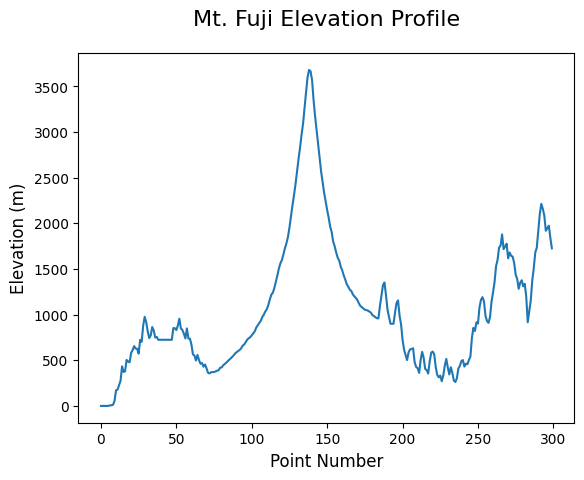

In [4]:
import matplotlib.pyplot as plt
plt.plot(fuji[:,0], fuji[:,3])

# Customize the plot
plt.title("Mt. Fuji Elevation Profile", fontsize=16, pad=20)
plt.xlabel("Point Number", fontsize=12)
plt.ylabel("Elevation (m)", fontsize=12)
plt.show()

In [5]:
# [Problem 2] Create a function to calculate the gradient at a certain point
import numpy as np

def climber_gradient(current_point, elevation_array):
  """
  Calculates the gradient at a specific point based on the elevation of the current and the previous point.

  Args:
    current_point (int): The index of the current point in the elevation array.
    elevation_array (ndarray): A 1-D NumPy array containing elevation data.

  Returns:
    float: The gradient at the current point. Returns 0 if the current_point is 0.
  """
  if current_point == 0:
    return 0.0
  else:
    elevation_current = elevation_array[current_point]
    elevation_previous = elevation_array[current_point - 1]
    gradient = elevation_current - elevation_previous
    return gradient


In [6]:
# Example usage:
elevation_data = np.array([100, 105, 110, 108, 112, 115])
current_location = 3
gradient_at_current = climber_gradient(current_location, elevation_data)
print(f"The gradient at point {current_location} is: {gradient_at_current}")

current_location = 0
gradient_at_current = climber_gradient(current_location, elevation_data)
print(f"The gradient at point {current_location} is: {gradient_at_current}")

The gradient at point 3 is: -2
The gradient at point 0 is: 0.0


In [7]:
# [Problem 3] Create a function to calculate the destination point
def destination_point_calculator(current_point, gradient, learning_rate=0.2):
  """
  Calculates the next destination point based on the current point, its gradient, and the learning rate.

  Args:
    current_point (int): The index of the current point.
    gradient (float): The gradient at the current point.
    learning_rate (float): A hyperparameter controlling the step size. Defaults to 0.2.

  Returns:
    int: The rounded integer index of the next destination point. Returns 0 if the calculated
         destination is negative.
  """
  destination_float = current_point - learning_rate * gradient
  destination_int = round(destination_float)
  if destination_int < 0:
    return 0
  else:
    return destination_int

In [9]:
# Example usage:
elevation_data = np.array([100, 105, 110, 108, 112, 115])
current_location = 3
gradient_at_current = climber_gradient(current_location, elevation_data)
print(f"The gradient at point {current_location} is: {gradient_at_current}")

next_destination = destination_point_calculator(current_location, gradient_at_current)
print(f"The next destination point is: {next_destination}")

current_location = 1
gradient_at_current = climber_gradient(current_location, elevation_data)
print(f"The gradient at point {current_location} is: {gradient_at_current}")

next_destination = destination_point_calculator(current_location, gradient_at_current, learning_rate=0.5)
print(f"The next destination point with a learning rate of 0.5 is: {next_destination}")

current_location = 0
gradient_at_current = climber_gradient(current_location, elevation_data)
next_destination = destination_point_calculator(current_location, gradient_at_current)
print(f"The next destination point when the current point is 0 is: {next_destination}")

The gradient at point 3 is: -2
The next destination point is: 3
The gradient at point 1 is: 5
The next destination point with a learning rate of 0.5 is: 0
The next destination point when the current point is 0 is: 0


In [10]:
# [Question 4] Create a function to go down a mountain
def go_down_mountain(initial_point, elevation_array, learning_rate=0.2):
  """
  Simulates descending a mountain using gradient descent.

  Args:
    initial_point (int): The starting point index.
    elevation_array (ndarray): A 1-dimensional NumPy array containing elevation data.
    learning_rate (float): The learning rate for calculating the next step. Defaults to 0.2.

  Returns:
    list: A list of the points visited during the descent.
  """
  current_point = initial_point
  path = [current_point]

  while True:
    gradient = climber_gradient(current_point, elevation_array)
    next_point = destination_point_calculator(current_point, gradient, learning_rate)

    if next_point == current_point:
      break  # Reached a local minimum or the bottom due to rounding
    elif next_point < 0 or next_point >= len(elevation_array):
      print("Warning: Destination point is out of bounds. Stopping descent.")
      break # Avoid going out of the array bounds
    else:
      current_point = next_point
      path.append(current_point)

  return path

In [11]:
fuji_elevation = np.array(fuji[:,3])
start_point = 136
descent_path = go_down_mountain(start_point, fuji_elevation)
print("Descent path:", descent_path)
print("Number of steps:", len(descent_path) - 1)
print("Final altitude:", fuji_elevation[descent_path[-1]])

Descent path: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
Number of steps: 13
Final altitude: 371.19


In [12]:
# [Problem 5] Visualization of the descent process
import numpy as np
import matplotlib.pyplot as plt

def go_down_mountain(initial_point, elevation_array, learning_rate=0.2):
  current_point = initial_point
  path = [current_point]
  gradients = [climber_gradient(current_point, elevation_array)]

  while True:
    gradient = climber_gradient(current_point, elevation_array)
    next_point = destination_point_calculator(current_point, gradient, learning_rate)

    if next_point == current_point:
      break
    else:
      current_point = next_point
      path.append(current_point)
      gradients.append(gradient)
      if next_point < 0 or next_point >= len(elevation_array):
        print("Warning: Destination point is out of bounds. Stopping descent.")
        break

  return path, gradients

In [13]:
fuji_elevation = np.array(fuji[:,3])
start_point = 136
learning_rate = 0.2
descent_path = go_down_mountain(start_point, fuji_elevation)
# Perform the descent
descent_path, descent_gradients = go_down_mountain(start_point, fuji_elevation, learning_rate)


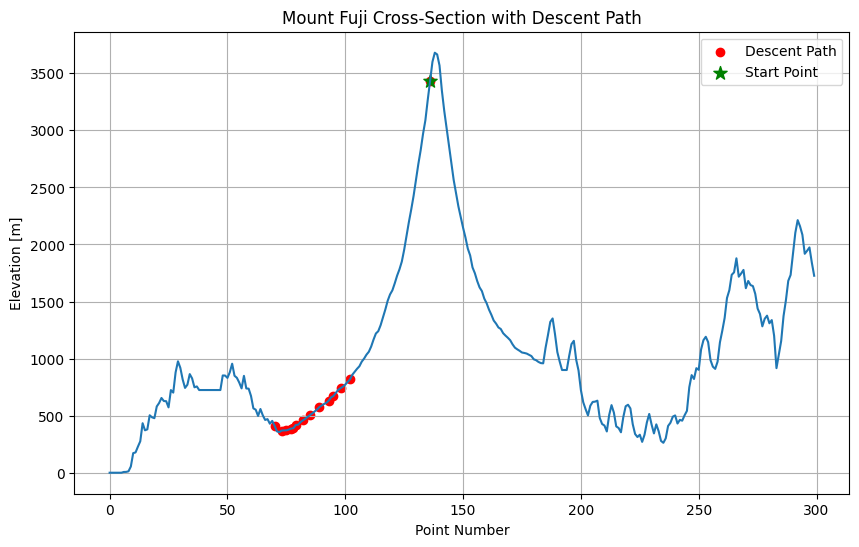

In [14]:
# 1. Display the moved point as a dot in the cross section
plt.figure(figsize=(10, 6))
plt.plot(fuji_elevation)
plt.scatter(descent_path, fuji_elevation[descent_path], color='red', label='Descent Path')
plt.scatter(start_point, fuji_elevation[start_point], color='green', marker='*', s=100, label='Start Point')
plt.xlabel("Point Number")
plt.ylabel("Elevation [m]")
plt.title("Mount Fuji Cross-Section with Descent Path")
plt.legend()
plt.grid(True)
plt.show()

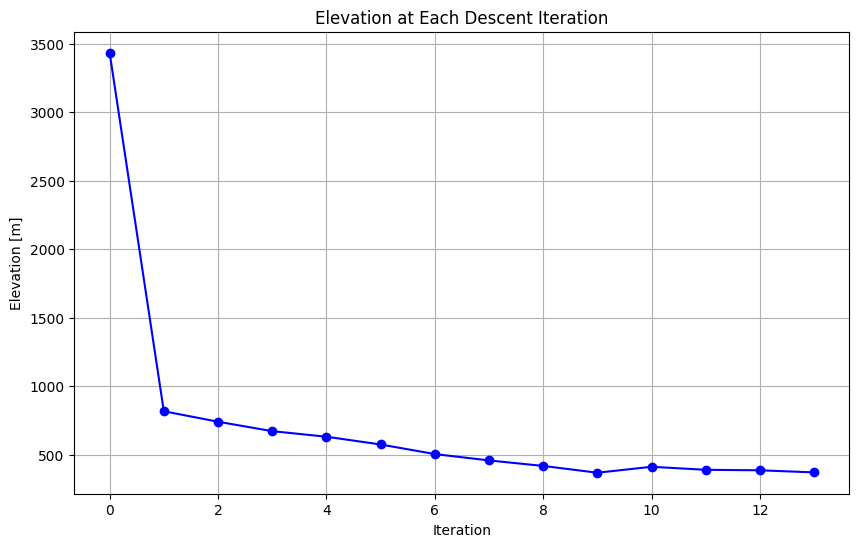

In [15]:
# 2. Create a line graph of the elevation for each iteration
descent_elevations = fuji_elevation[descent_path]
iterations = range(len(descent_path))

plt.figure(figsize=(10, 6))
plt.plot(iterations, descent_elevations, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel("Elevation [m]")
plt.title("Elevation at Each Descent Iteration")
plt.grid(True)
plt.show()

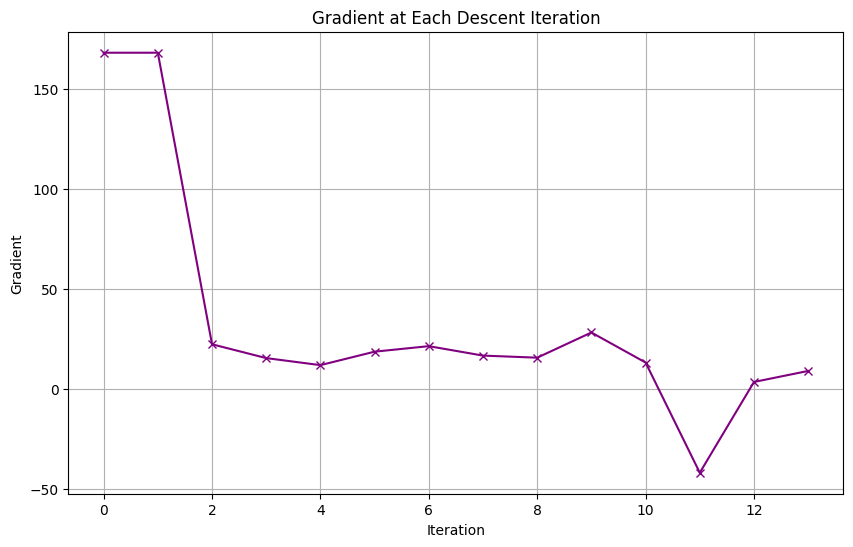

In [16]:
# 3. Create a line graph of the gradient for each iteration
iterations_gradient = range(len(descent_gradients)) # The number of gradients should now match the number of steps
plt.figure(figsize=(10, 6))
plt.plot(iterations_gradient, descent_gradients, marker='x', linestyle='-', color='purple')
plt.xlabel("Iteration")
plt.ylabel("Gradient")
plt.title("Gradient at Each Descent Iteration")
plt.grid(True)
plt.show()

In [ ]:
def go_down_mountain(initial_point, elevation_array, learning_rate=0.2):
  current_point = initial_point
  path = [current_point]
  gradients = []

  while True:
    gradient = climber_gradient(current_point, elevation_array)
    next_point = destination_point_calculator(current_point, gradient, learning_rate)

    if next_point == current_point:
      break
    else:
      gradients.append(gradient)
      current_point = next_point
      path.append(current_point)
      if next_point < 0 or next_point >= len(elevation_array):
        print(f"Warning: Destination point {next_point} out of bounds. Stopping descent from initial point {initial_point}.")
        break

  return path, gradients

# Set the learning rate
learning_rate = 0.2

# Iterate through all possible starting points
all_descent_paths = {}
for start_point in range(len(fuji_elevation)):
  path, _ = go_down_mountain(start_point, fuji_elevation, learning_rate)
  all_descent_paths[start_point] = path

In [ ]:
# [Problem 7] Visualization of the descent process for each initial value
import numpy as np
import matplotlib.pyplot as plt
def go_down_mountain(initial_point, elevation_array, learning_rate=0.2):
  current_point = initial_point
  path = [current_point]
  gradients = []

  while True:
    gradient = climber_gradient(current_point, elevation_array)
    next_point = destination_point_calculator(current_point, gradient, learning_rate)

    if next_point == current_point:
      break
    else:
      gradients.append(gradient)
      current_point = next_point
      path.append(current_point)
      if next_point < 0 or next_point >= len(elevation_array):
        print(f"Warning: Destination point {next_point} out of bounds. Stopping descent from initial point {initial_point}.")
        break

  return path, gradients

# Set the learning rate
learning_rate = 0.2

# Choose several initial points for visualization
initial_points_to_visualize = [10, 50, 136, 142, 180, 250]
descent_data_to_visualize = {}
fuji_elevation = np.array(fuji[:,3])
# Calculate the descent path and gradients for each selected initial point
for start_point in initial_points_to_visualize:
  path, gradients = go_down_mountain(start_point, fuji_elevation, learning_rate)
  descent_data_to_visualize[start_point] = {'path': path, 'gradients': gradients}

# --- Visualization for each initial value ---
for start_point, data in descent_data_to_visualize.items():
  path = data['path']
  gradients = data['gradients']
  descent_elevations = fuji_elevation[path]
  iterations = range(len(path))
  iterations_gradient = range(len(gradients))

  # 1. Display the moved point as a dot in the cross section
  plt.figure(figsize=(12, 6))
  plt.plot(fuji_elevation, label='Mount Fuji Elevation')
  plt.scatter(path, descent_elevations, color='red', label=f'Descent Path (Start: {start_point})')
  plt.scatter(start_point, fuji_elevation[start_point], color='green', marker='*', s=100, label='Start Point')
  plt.xlabel("Point Number")
  plt.ylabel("Elevation [m]")
  plt.title(f"Descent Path from Initial Point: {start_point}")
  plt.legend()
  plt.grid(True)
  plt.show()

  # 2. Create a line graph of the elevation for each iteration
  plt.figure(figsize=(12, 6))
  plt.plot(iterations, descent_elevations, marker='o', linestyle='-', color='blue')
  plt.xlabel("Iteration")
  plt.ylabel("Elevation [m]")
  plt.title(f"Elevation at Each Iteration (Start: {start_point})")
  plt.grid(True)
  plt.show()

  # 3. Create a line graph of the gradient for each iteration
  if gradients:  # Check if there were any steps taken
    plt.figure(figsize=(12, 6))
    plt.plot(iterations_gradient, gradients, marker='x', linestyle='-', color='purple')
    plt.xlabel("Iteration")
    plt.ylabel("Gradient")
    plt.title(f"Gradient at Each Iteration (Start: {start_point})")
    plt.grid(True)
    plt.show()
  else:
    print(f"No descent occurred from initial point {start_point}.")


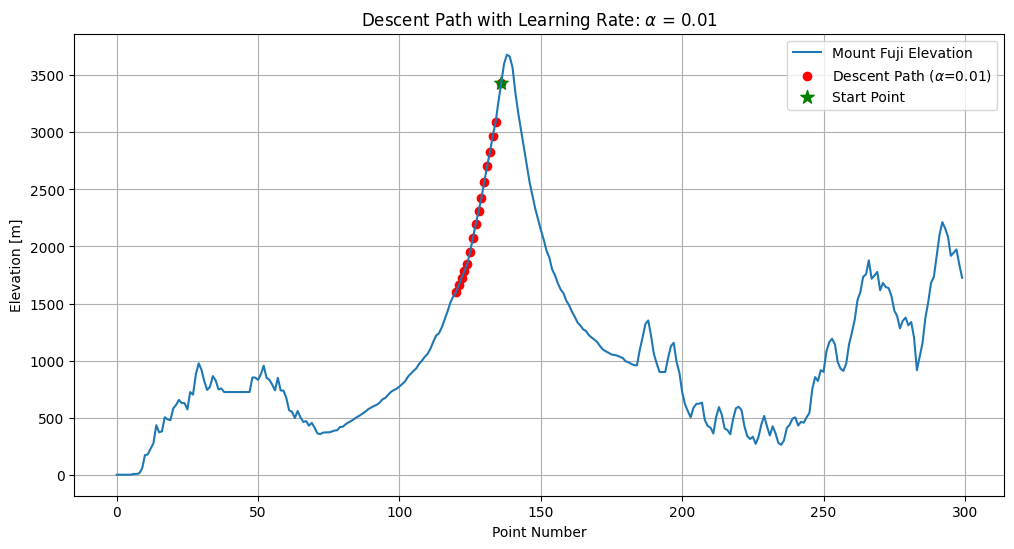

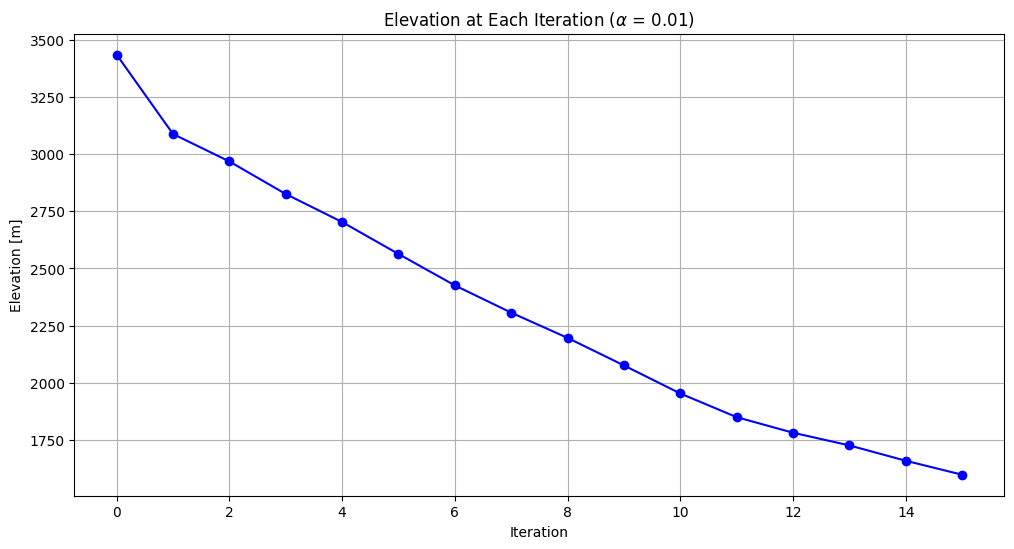

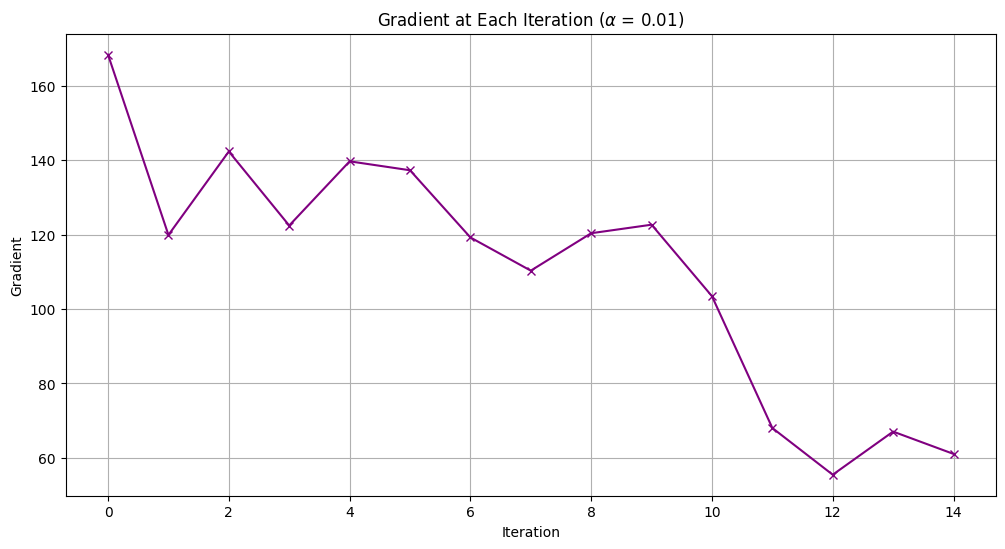

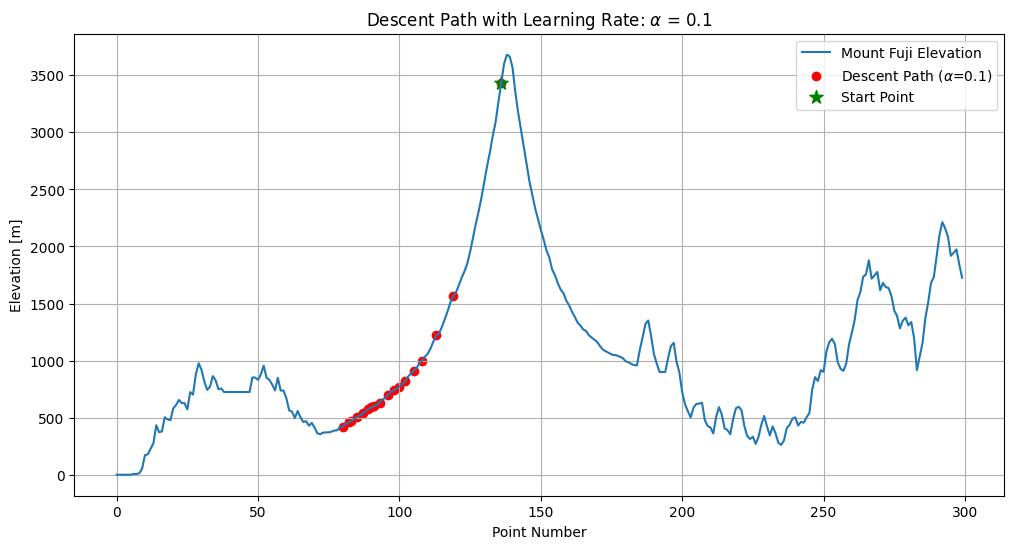

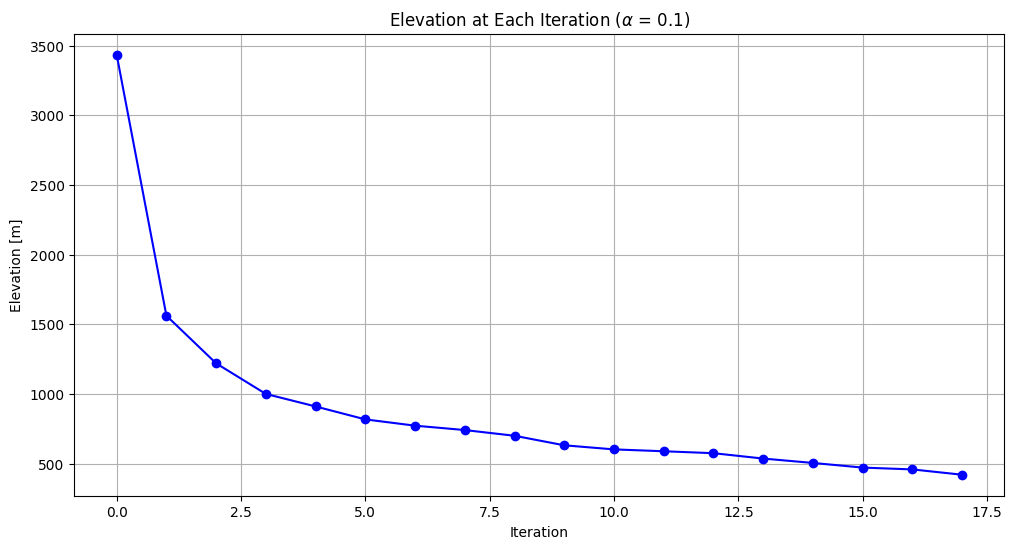

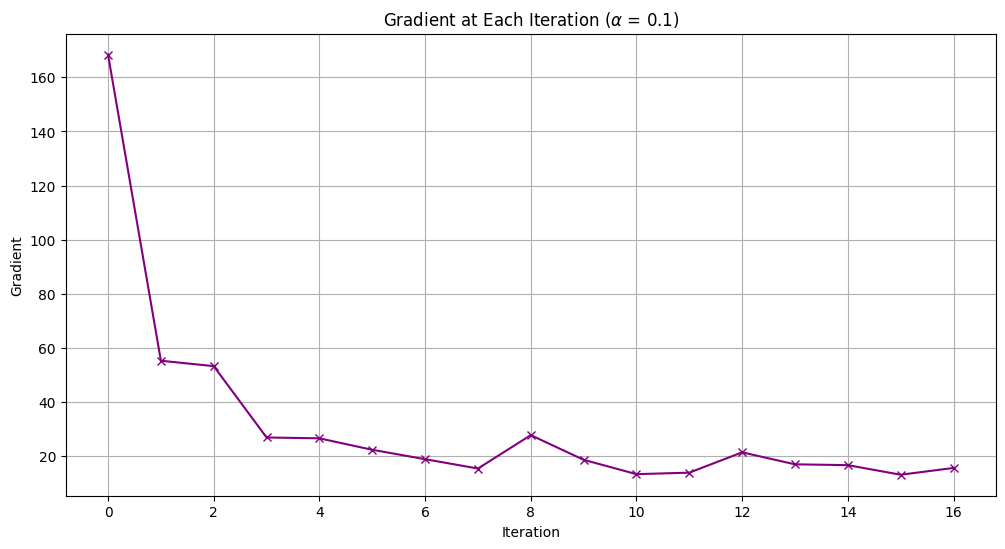

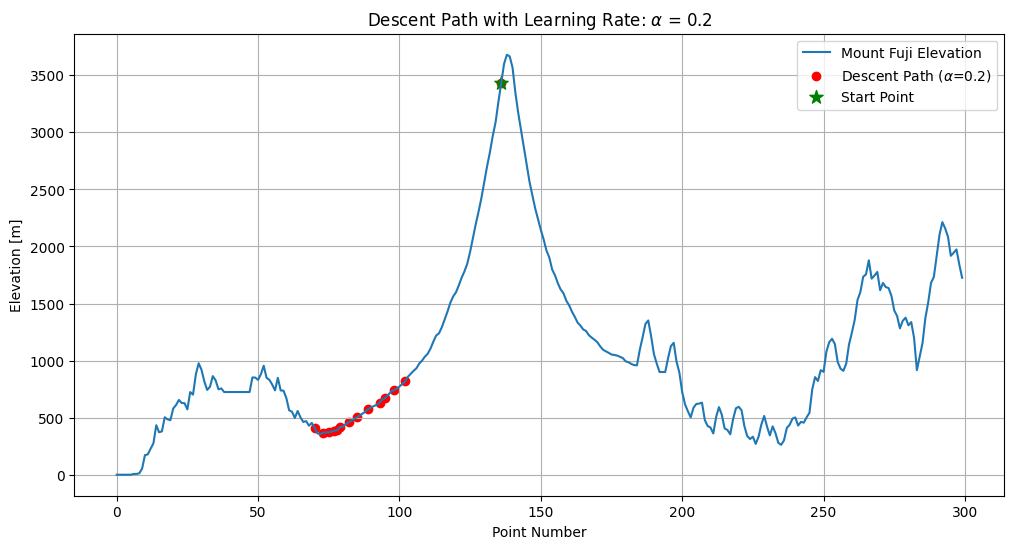

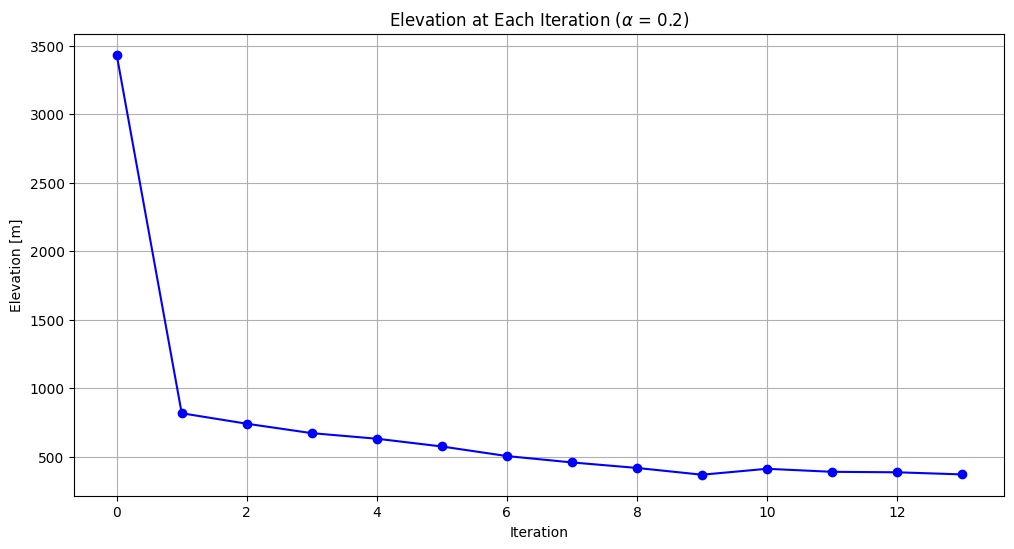

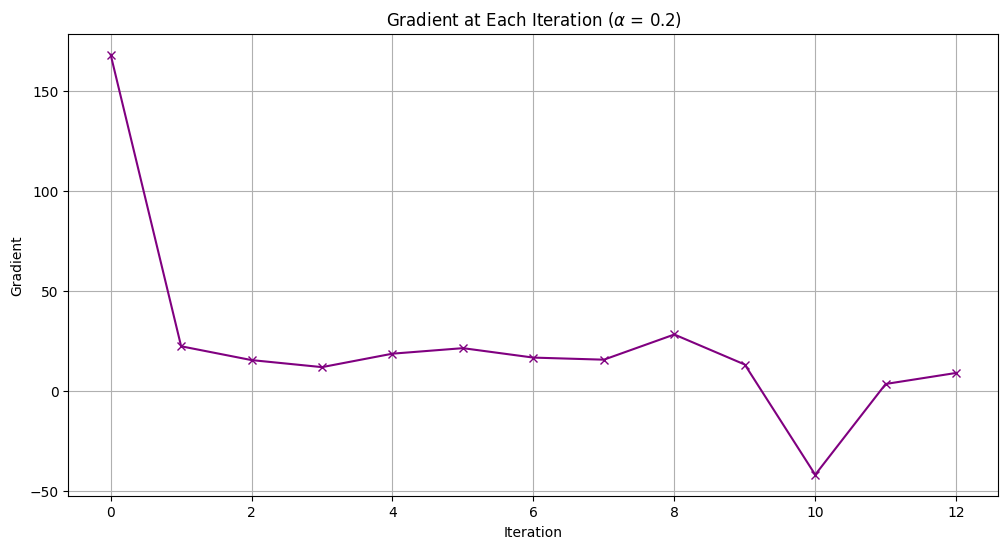

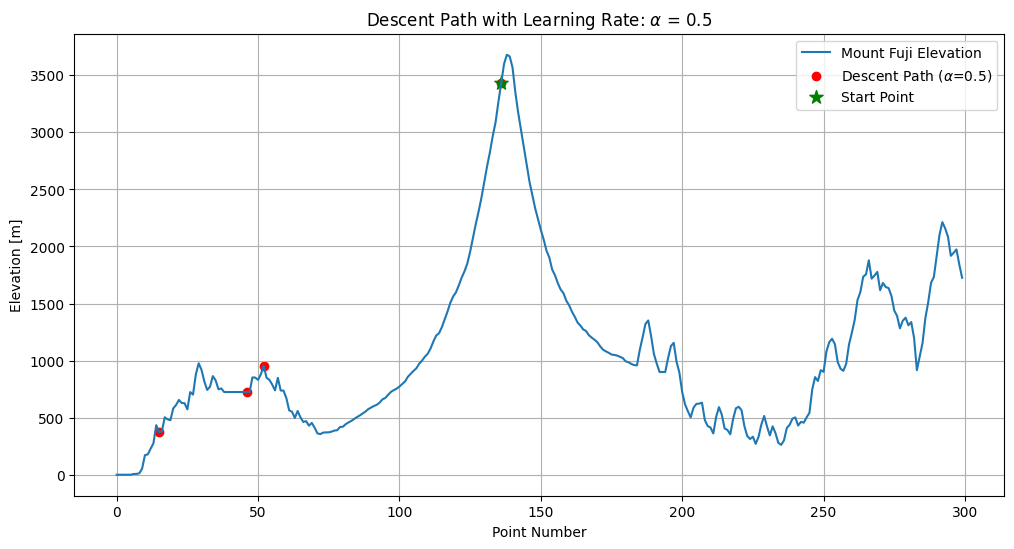

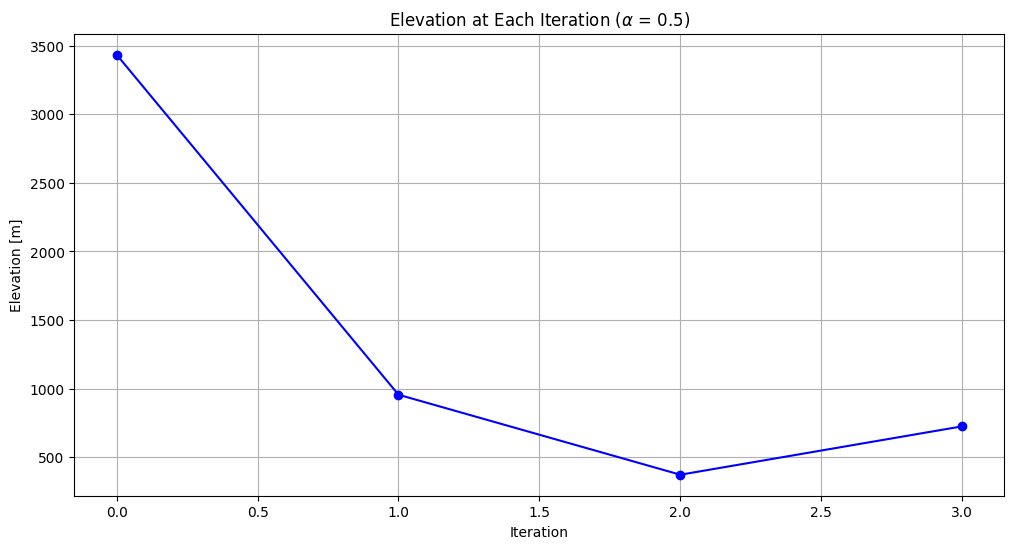

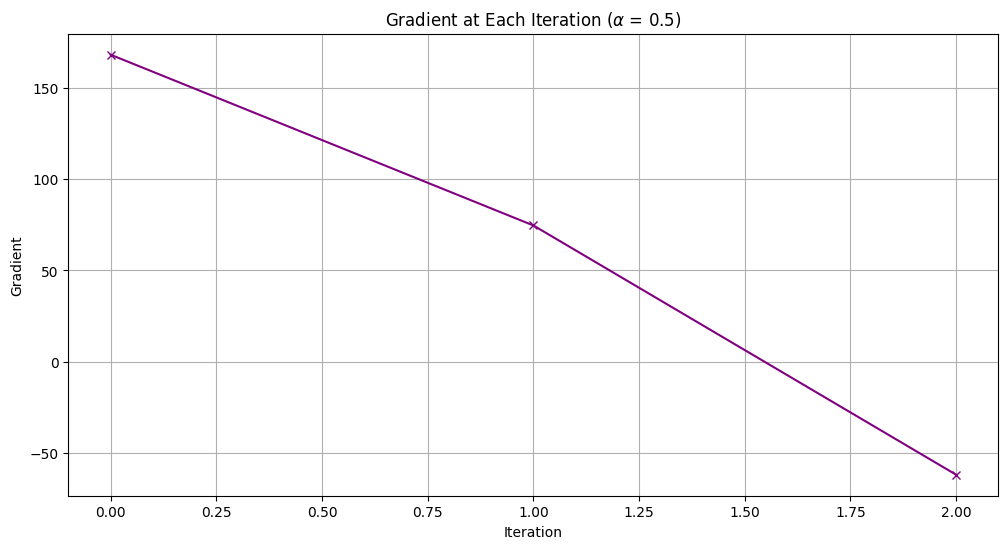

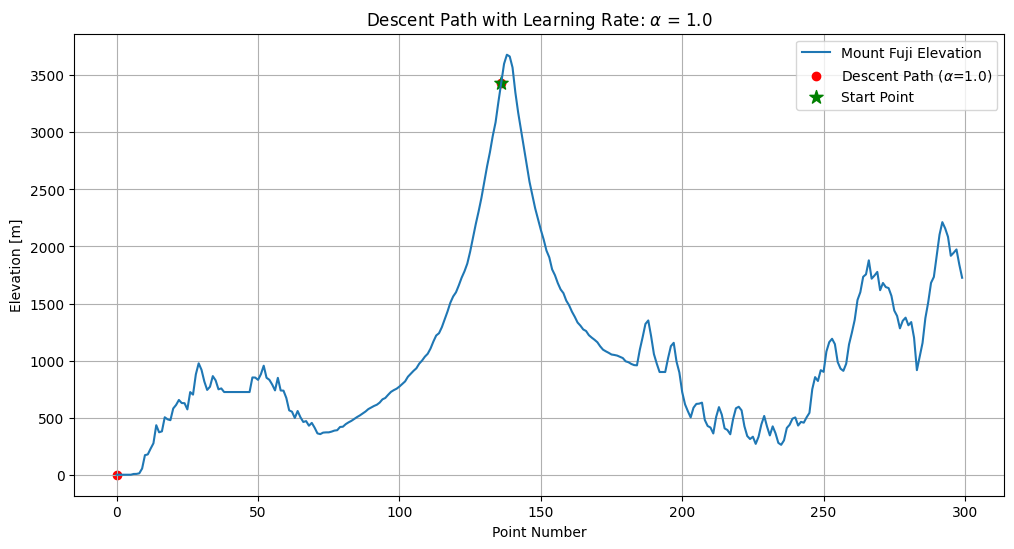

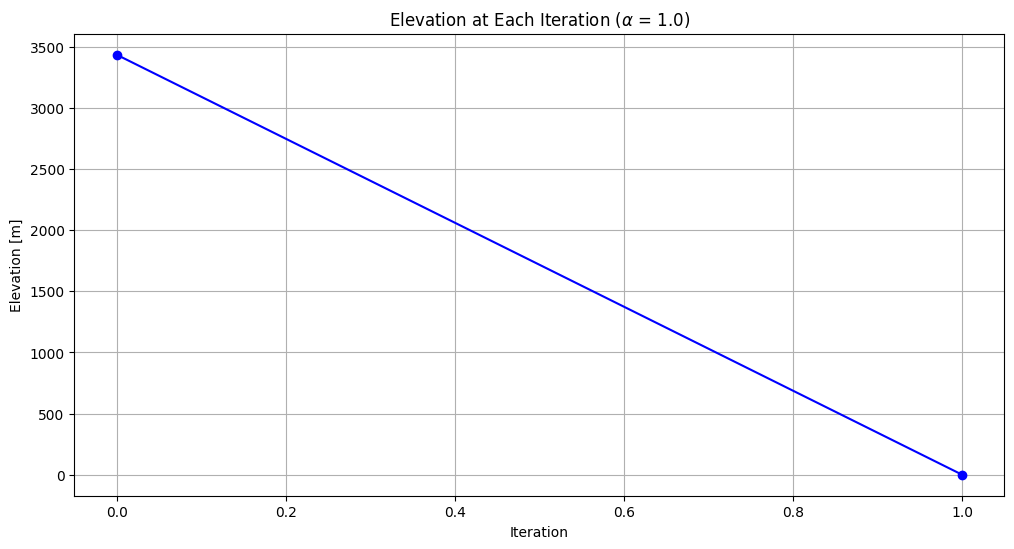

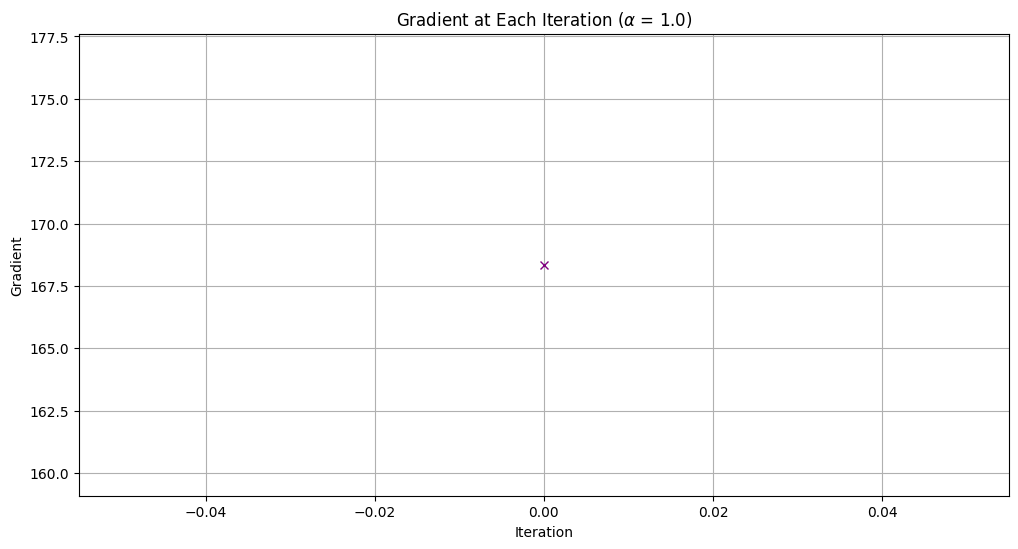

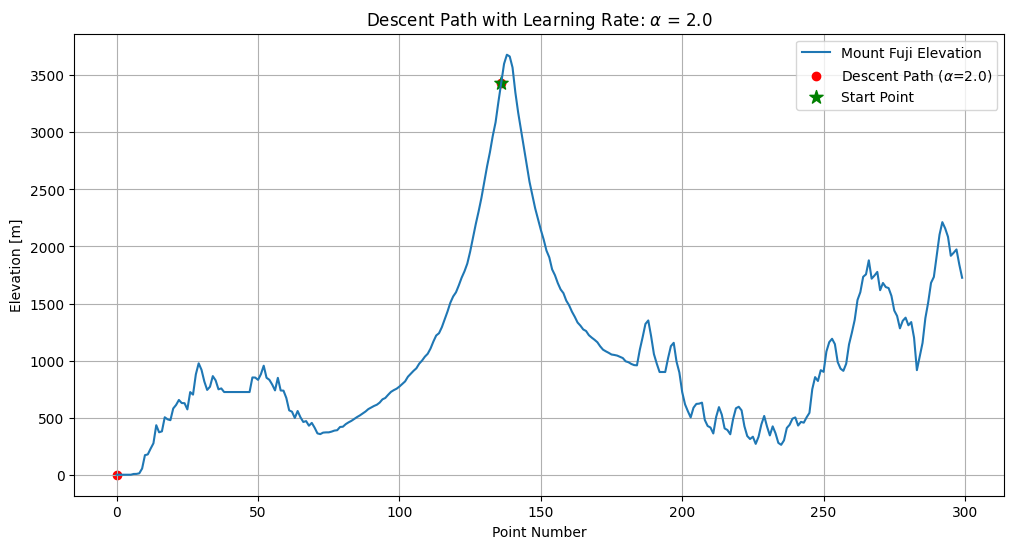

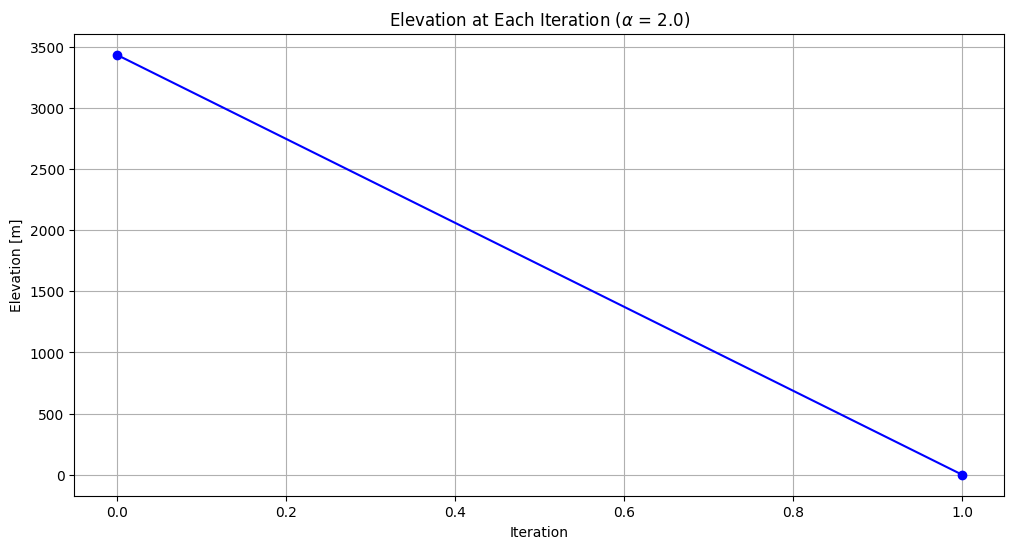

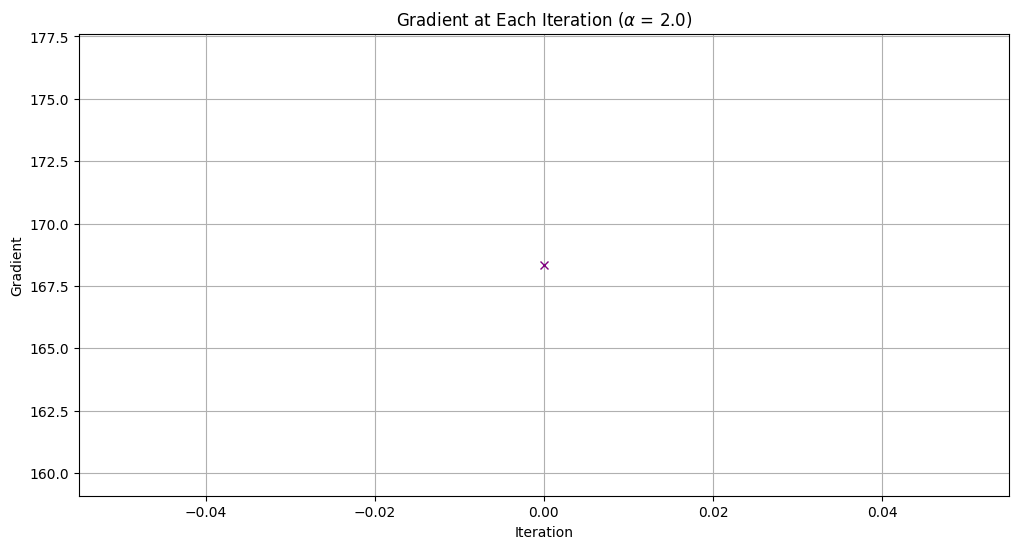

In [17]:
# [Problem 8] (Advanced problem) Changing hyperparameters

def go_down_mountain(initial_point, elevation_array, learning_rate):
  current_point = initial_point
  path = [current_point]
  gradients = []

  while True:
    gradient = climber_gradient(current_point, elevation_array)
    next_point = destination_point_calculator(current_point, gradient, learning_rate)

    if next_point == current_point:
      break
    else:
      gradients.append(gradient)
      current_point = next_point
      path.append(current_point)
      if next_point < 0 or next_point >= len(elevation_array):
        print(f"Warning: Destination point {next_point} out of bounds. Stopping descent from initial point {initial_point} with learning rate {learning_rate}.")
        break

  return path, gradients

# Set the initial point
start_point = 136

# Define a range of learning rates (alpha values) to test
learning_rates_to_test = [0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
descent_data_by_lr = {}

# Calculate the descent process for each learning rate
for lr in learning_rates_to_test:
  path, gradients = go_down_mountain(start_point, fuji_elevation, lr)
  descent_data_by_lr[lr] = {'path': path, 'gradients': gradients}

# --- Visualization for each learning rate ---
for lr, data in descent_data_by_lr.items():
  path = data['path']
  gradients = data['gradients']
  descent_elevations = fuji_elevation[path]
  iterations = range(len(path))
  iterations_gradient = range(len(gradients))

  # 1. Display the moved point as a dot in the cross section
  plt.figure(figsize=(12, 6))
  plt.plot(fuji_elevation, label='Mount Fuji Elevation')
  plt.scatter(path, descent_elevations, color='red', label=f'Descent Path ($\\alpha$={lr})')
  plt.scatter(start_point, fuji_elevation[start_point], color='green', marker='*', s=100, label='Start Point')
  plt.xlabel("Point Number")
  plt.ylabel("Elevation [m]")
  plt.title(f"Descent Path with Learning Rate: $\\alpha$ = {lr}")
  plt.legend()
  plt.grid(True)
  plt.show()

  # 2. Create a line graph of the elevation for each iteration
  plt.figure(figsize=(12, 6))
  plt.plot(iterations, descent_elevations, marker='o', linestyle='-', color='blue')
  plt.xlabel("Iteration")
  plt.ylabel("Elevation [m]")
  plt.title(f"Elevation at Each Iteration ($\\alpha$ = {lr})")
  plt.grid(True)
  plt.show()

  # 3. Create a line graph of the gradient for each iteration
  if gradients:
    plt.figure(figsize=(12, 6))
    plt.plot(iterations_gradient, gradients, marker='x', linestyle='-', color='purple')
    plt.xlabel("Iteration")
    plt.ylabel("Gradient")
    plt.title(f"Gradient at Each Iteration ($\\alpha$ = {lr})")
    plt.grid(True)
    plt.show()
  else:
    print(f"No descent occurred with learning rate $\\alpha$ = {lr}.")